In [252]:
# import the libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [253]:
# Reading the file
# Here low_memory is passed as false because it was showing a warning to set the low memory to be false.
# The encoding used is UTF-8 as it is the most standard encoding(Supports most of the languages)
inp=pd.read_csv('loan.csv',encoding='utf-8',low_memory=False)

In [254]:
# Checking the head
inp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [255]:
inp.shape

(39717, 111)

In [256]:
#Checking the null values
round(100*(inp.isnull().sum()/len(inp.id)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

As we can see there are columns, which are 100% empty. Let's drop'em.

In [257]:
#Removing the NA columns.
cleanedDF=inp.dropna(axis=1,how='all')

In [258]:
cleanedDF.shape

(39717, 57)

In [259]:
# Again checking the null values in the data frame.
round(100*(cleanedDF.isnull().sum()/len(cleanedDF.id)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [260]:
# Dropping columns that aren't of any use, or are probably null.
# Desc column won't be of any use to us. As we aren't interested in knowing the description of the loan borrowed.
colsToBeDropped=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]
cleanedDF.drop(labels=colsToBeDropped,axis=1,inplace=True)

In [261]:
cleanedDF.shape

(39717, 53)

In [262]:
round(100*(cleanedDF.isnull().sum()/len(cleanedDF.id)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [263]:
# Confirming number of null rows and removing the rows from data frame
cleanedDF.emp_title.isnull().sum()

2459

In [264]:
cleanedDF=cleanedDF[~cleanedDF.emp_title.isnull()]

In [265]:
# Cleaning employee length
cleanedDF.emp_length.isnull().sum()

56

In [266]:
cleanedDF=cleanedDF[~cleanedDF.emp_length.isnull()]

In [267]:
# Cleaning title, where title is null.
cleanedDF.title.isnull().sum()

9

In [268]:
cleanedDF=cleanedDF[~cleanedDF.title.isnull()]

In [269]:
# Cleaning revol_util
cleanedDF.revol_util.isnull().sum()

46

In [270]:
cleanedDF=cleanedDF[~cleanedDF.revol_util.isnull()]

In [271]:
# Cleaning rows of last_pymnt_d, where last_pymnt_d is null.
cleanedDF.last_pymnt_d.isnull().sum()

60

In [272]:
cleanedDF=cleanedDF[~cleanedDF.last_pymnt_d.isnull()]

In [273]:
# cleaning rows where last_credit_pull_d is null.
cleanedDF.last_credit_pull_d.isnull().sum()
cleanedDF=cleanedDF[~cleanedDF.last_credit_pull_d.isnull()]

In [274]:
#cleaning rows of collections_12_mths_ex_med
cleanedDF.collections_12_mths_ex_med.isnull().sum()

47

In [275]:
cleanedDF=cleanedDF[~cleanedDF.collections_12_mths_ex_med.isnull()]

In [276]:
# Cleaning rows where chargeoff_within_12_mths is null
cleanedDF.chargeoff_within_12_mths.isnull().sum()
cleanedDF=cleanedDF[~cleanedDF.chargeoff_within_12_mths.isnull()]

In [277]:
# Cleaning pub_rec_bankruptcies rows, where pub_rec_bankruptcies is null
cleanedDF.pub_rec_bankruptcies.isnull().sum()

609

In [278]:
cleanedDF=cleanedDF[~cleanedDF.pub_rec_bankruptcies.isnull()]

In [279]:
#Cleaning rows where tax_liens is null.
cleanedDF.tax_liens.isnull().sum()
cleanedDF=cleanedDF[~cleanedDF.tax_liens.isnull()]

In [280]:
#Checking the shape
cleanedDF.shape

(36431, 53)

Checking the null values all over the data frame again

In [281]:
round(100*(cleanedDF.isnull().sum()/len(cleanedDF.id)),2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [282]:
# Converting issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d to date and time. In year/month/day format
cleanedDF.issue_d=pd.to_datetime(cleanedDF.issue_d,errors='coerce')
cleanedDF.earliest_cr_line=pd.to_datetime(cleanedDF.earliest_cr_line,errors='coerce')
cleanedDF.last_pymnt_d=pd.to_datetime(cleanedDF.last_pymnt_d,errors='coerce')
cleanedDF.last_credit_pull_d=pd.to_datetime(cleanedDF.last_credit_pull_d,errors='coerce')

In [283]:
# Removing % sign from int_rate and revol_util
cleanedDF['int_rate']=cleanedDF['int_rate'].str.replace('%','').astype('float')
cleanedDF['revol_util']=cleanedDF['revol_util'].str.replace('%','').astype('float')

In [284]:
# Checking interest rate values
cleanedDF.int_rate.describe()

count    36431.000000
mean        12.073891
std          3.734857
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [285]:
# Checking revol_util values
cleanedDF.revol_util.describe()

count    36431.000000
mean        49.276069
std         28.192248
min          0.000000
25%         26.100000
50%         49.900000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

In [286]:
# Analyzing emp_length column
cleanedDF.emp_length.value_counts()

10+ years    8407
2 years      4176
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

# Year values are in between 0 to 10 as follows:
No. years in data frame|Integer eqquivalent
---|---
< 1 year|0
1 year|1
2 years|2
3 years|3
4 years|4
5 years|5
6 years|6
7 years|7
8 years|8
9 years|9
10+ years|10

This values needs to be replaced in the data frame to make more meaningful outcomes.

In [287]:
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('< 1 year','0')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('1 year','1')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('2 years','2')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('3 years','3')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('4 years','4')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('5 years','5')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('6 years','6')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('7 years','7')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('8 years','8')
cleanedDF['emp_length']=cleanedDF['emp_length'].str.replace('9 years','9')
cleanedDF.emp_length.replace('10+ years','10', inplace=True)

In [288]:
cleanedDF['emp_length']=cleanedDF['emp_length'].astype('int64')

In [289]:
cleanedDF.emp_length.value_counts()

10    8407
2     4176
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [290]:
cleanedDF.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [291]:
# Removing the loans who have their status as current as they are not of any use for the analysis.
cleanedDF=cleanedDF[cleanedDF['loan_status']!='Current']

---
# Data Visualization
---

The following are the univariate analysis.
Univariate analysis is the simplest form of making analysis. Basically here we've created how a single variable behaves with other fields of the column.

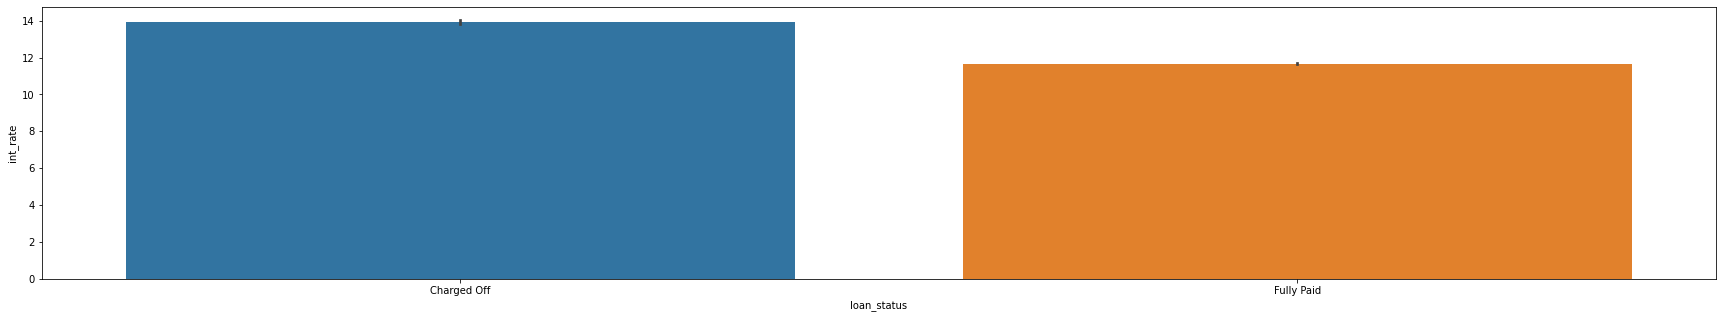

In [292]:
plt.figure(figsize=(30, 5))
sns.barplot(x='loan_status',y='int_rate',data=cleanedDF)
plt.show()

The above bar plots represents the loan status(X-axis) vs. the rate of interest(Y-axis)

From the graph it is very clear that as interest rate increases, the rate of defaulting a loan increases. It can be said that the rate of interest and rate of defaulting are directly proportional to each other.

In [293]:
cleanedDF['term'].value_counts()

 36 months    26375
 60 months     8990
Name: term, dtype: int64

In [294]:
# Converting term to integer from object to perform our analysis:
cleanedDF['term']=cleanedDF['term'].str.replace(' months','').astype('int64')

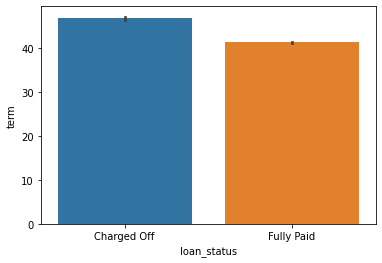

In [295]:
sns.barplot(x='loan_status',y='term',data=cleanedDF)
plt.show()

The bar plot is of loan status(X-axis) vs term(Y-axis).

It is much clear from the above graph that, higher the term higher the default rate would be.
Roughly loans having tenure of 40 or more years are likely to be default.

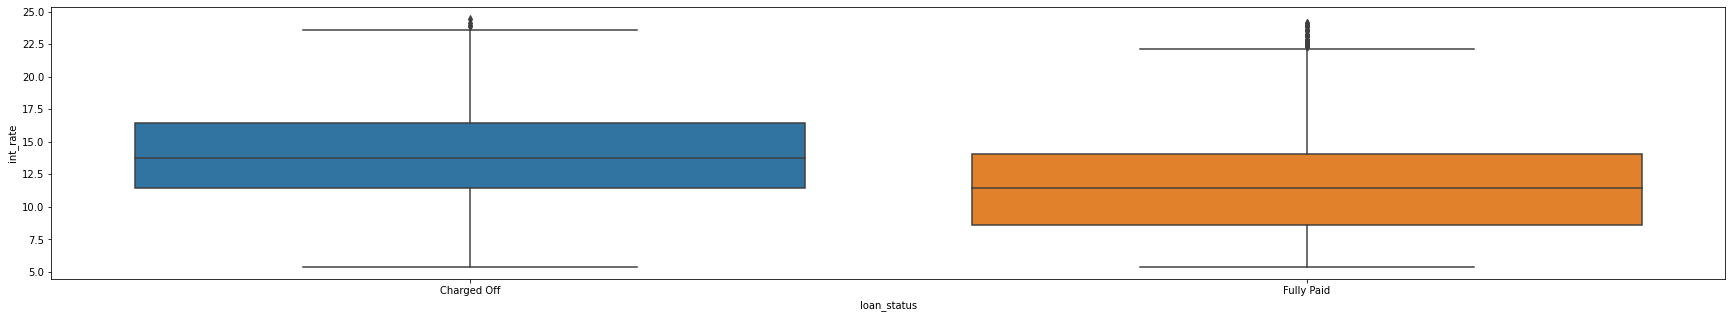

In [296]:
# visualizing a box plot would further help to analyze the median values when loan status is compared with rate of interest
plt.figure(figsize=(30, 5))
sns.boxplot(x='loan_status',y='int_rate',data=cleanedDF)
plt.show()

The median of defaulters is quite higher then the median of full paid customers. Here higher median when the rates are high and the loan to be default is high clearly justifies our above assumption that rate of interest is directly proportional with a loan to be defaulted. ( Rate of interest is ∝ loan would be defaulted).

The loans are fully paid upto a certain rate of interest,i.e, roughly around 13.5%. Which implies the rate of interest should not be higher that 13.5%(approx) while assigning a loan.

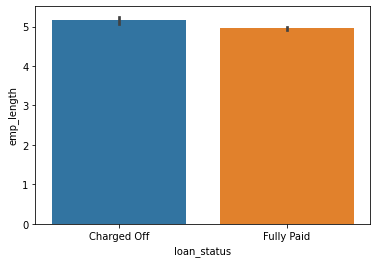

In [297]:
sns.barplot(x='loan_status',y='emp_length',data=cleanedDF)
plt.show()

From the above barplot it is not clear that, what usefult insight can be drawn out from the bar plots, as both the graphs are very much similar. Hence let us see if a boxplot can throw some more light, and see if it gives us useful insights.

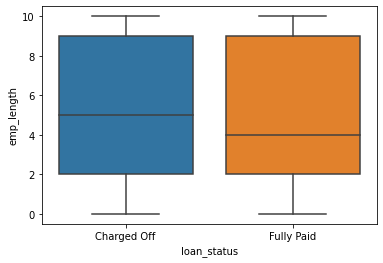

In [298]:
sns.boxplot(x='loan_status',y='emp_length',data=cleanedDF)
plt.show()

Here both the box plots are a bit similar, But a strong insight can be found that the medain values, when the load is charged off is a bit higher. So customers of higher age have little chances of defaulting a loan.

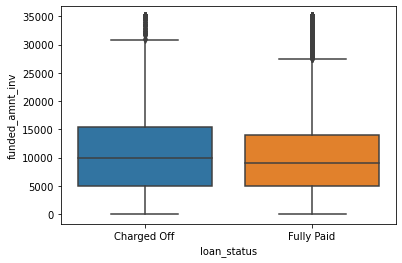

In [299]:
sns.boxplot(x='loan_status',y='funded_amnt_inv',data=cleanedDF)
plt.show()

Here one can say that more the investers invest, the more likely it is for a loan to be defaulted.

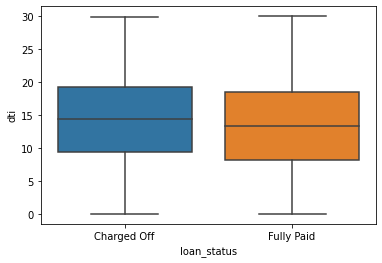

In [300]:
sns.boxplot(x='loan_status',y='dti',data=cleanedDF)
plt.show()

From this boxplots one can say that, if a person has high expenditure per month, then that customer is most likely to default the loan. This statement is based on the median line which is higher than the median line of fully paid customers.

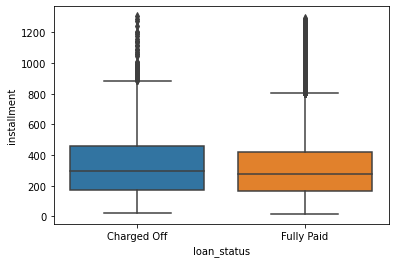

In [301]:
sns.boxplot(x='loan_status',y='installment',data=cleanedDF)
plt.show()

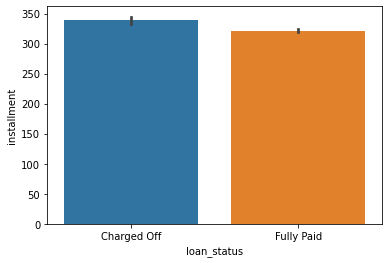

In [302]:
sns.barplot(x='loan_status',y='installment',data=cleanedDF)
plt.show()

An insight can be found from the boxplots, which is later justified by the barplots too, That higher the installments the more likely the loan is to be defaulted. Which is but obvious, because higher installments means higher loan or a high rate of interest. As we have seen earlier that high rate of interest results in loan to be defaulted.

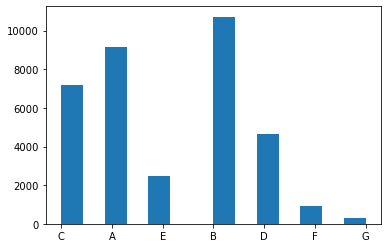

In [303]:
plt.hist(cleanedDF.grade,bins=14)
plt.show()

Here we've taken 14 as numbers of bins, because there are total 7 different categories. So to analyse the histogram properly and sparsely we have taken 14 as the number of bins. From the histogram is clear that majority of loan holders falls under the cactegory B. The categories are decided by the lending club and the values are present in the data frame.

From here the bivariate analysis are getting started, Bivariate analysis, is basically when the number of variables to be analyzed are more than two. In other words how two vairables have an impact on the third field and so on can be calculated using this kind of analysis.

In [304]:
# Analysing the numeric values of total number of loans paid, and derive a new column
cleanedDF['loan_status_binary']=cleanedDF['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
cleanedDF.pivot_table(values='loan_status_binary',index='grade',aggfunc='sum')

,loan_status_binary
grade,
A,513
B,1253
C,1169
D,980
E,648
F,286
G,93


,loan_status_binary,% Charged_off
grade,,
A,513,5.612691
B,1253,11.690614
C,1169,16.281337
D,980,21.021021
E,648,26.118501
F,286,31.707317
G,93,32.978723


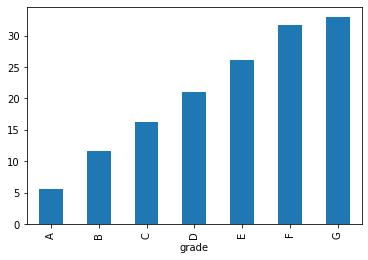

In [305]:
# Let's look at what percentage of the loan is charged off category-wise
table = cleanedDF.pivot_table(values='loan_status_binary',index='grade',aggfunc='sum')
table['% Charged_off'] = table['loan_status_binary']/cleanedDF.grade.value_counts().sort_index(ascending = True)
table['% Charged_off'] = table['% Charged_off'].apply(lambda x: x*100)
table['% Charged_off'].plot.bar()
table

Here from the histogram and the table it is clear that 'G' grade has highest number of defaulters. And 'A' grade has lowest number of defaulters.

In [306]:
#Grouping DTI
cleanedDF['dti_group']=cleanedDF['dti'].apply(lambda x:'low'if x<=10 else ('Medium' if x>10 and x<=20  else 'High'))
cleanedDF['dti_group'].value_counts().sort_index(ascending=True)
cleanedDF['% Charged_off']=table['loan_status_binary']/cleanedDF['dti_group'].value_counts().sort_index(ascending=True)

,loan_status_binary,% Charged_off
dti_group,,
High,1081,16.040956
Medium,2494,14.610428
low,1367,11.829353


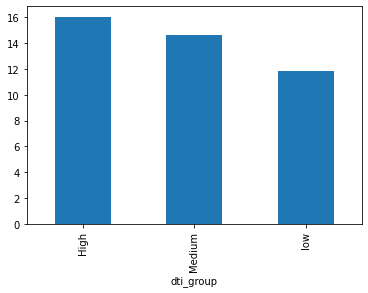

In [307]:
#DTI Vs Loan Status Analysis
table=cleanedDF.pivot_table(values=['loan_status_binary'],index=['dti_group'],aggfunc=sum)
table['% Charged_off']=table['loan_status_binary']/cleanedDF['dti_group'].value_counts().sort_index(ascending=True)
table['% Charged_off']=table['% Charged_off'].apply(lambda x:x*100)
table['% Charged_off'].plot.bar()
pivotForHeatmapDTI=table
table

Here we have divided the dti column by high, medium and low, from the dti column. This are the monthly debts of a customer. Based on the debts the bifurcation is made into a seperate derived column names dti_group.

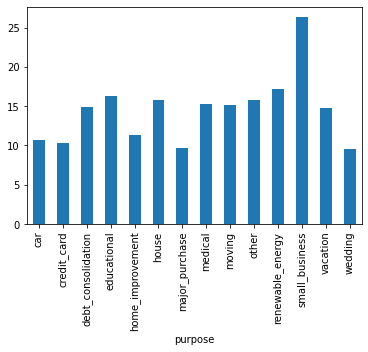

,loan_status_binary,% Charged_off
purpose,,
car,149,10.681004
credit_card,479,10.354518
debt_consolidation,2508,14.832338
educational,45,16.304348
home_improvement,296,11.323642
house,52,15.757576
major_purchase,190,9.630005
medical,95,15.273312
moving,79,15.105163


In [308]:
# Identifying the purpose of loan when it is paid.
table=cleanedDF.pivot_table(values=['loan_status_binary'],index=['purpose'],aggfunc=sum)
table['% Charged_off']=table['loan_status_binary']/cleanedDF['purpose'].value_counts()
table['% Charged_off']=table['% Charged_off'].apply(lambda x: x*100)
table['% Charged_off'].plot.bar()
plt.show()
table

Here from the pivot table and the graph it is clear that most number of loans have been taken for debt_consolidation, and the least number of loans have been taken for renewable energy. Hence if a customer comes and demands for a loan when the purpose is renewable we should double check for the eligibility of the customer before approving the loan. Because the charge-off percentage is also higher for this category, with less number of loans.

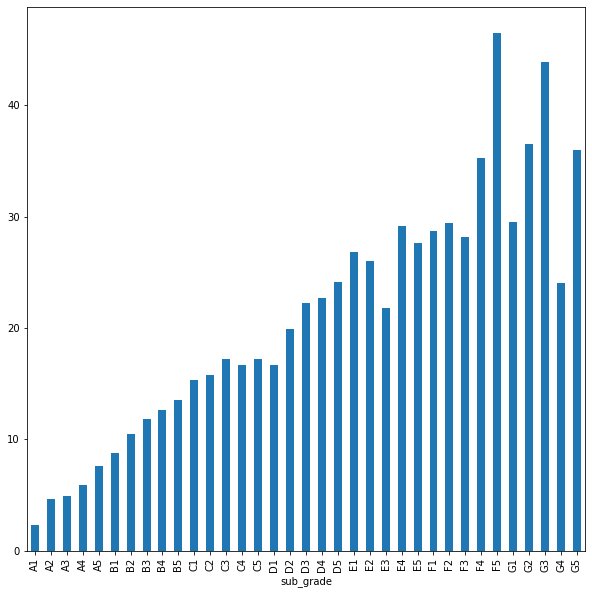

,loan_status_binary,% Charged_off
sub_grade,,
A1,23,2.288557
A2,63,4.646018
A3,80,4.907975
A4,158,5.935387
A5,189,7.599517
B1,141,8.741476
B2,191,10.465753
B3,307,11.857860
B4,283,12.594571


In [309]:
table=cleanedDF.pivot_table(values=['loan_status_binary'],index=['sub_grade'],aggfunc=sum)
table['% Charged_off']=table['loan_status_binary']/cleanedDF['sub_grade'].value_counts().sort_index(ascending=True)
table['% Charged_off']=table['% Charged_off'].apply(lambda x: x*100)
plt.figure(figsize=(10,10))
table['% Charged_off'].plot.bar()
plt.show()
table

Here we've breaked each category five times to have a even more granular data. This will help us to analyse the data more minute details.

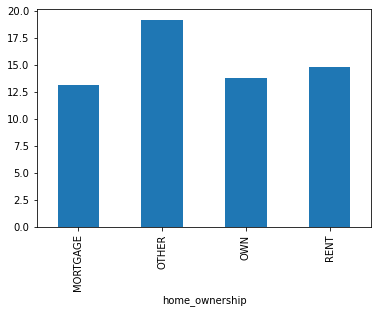

,loan_status_binary,% Charged_off
home_ownership,,
MORTGAGE,2061,13.126552
OTHER,18,19.148936
OWN,346,13.812375
RENT,2517,14.749487


In [310]:
table=cleanedDF.pivot_table(values=['loan_status_binary'],index=['home_ownership'],aggfunc=sum)
table['% Charged_off']=table['loan_status_binary']/cleanedDF['home_ownership'].value_counts().sort_index(ascending=True)
table['% Charged_off']=table['% Charged_off'].apply(lambda x:x*100)
table['% Charged_off'].plot.bar()
plt.show()
table

Here we analyzed that, what is the current status of house where borrower lives in. This inference is obtained from the data dictionary. Where values of Other has highest rate of defaulters. On borrowers living in mortaged houses have less chance of defaulting a loan.

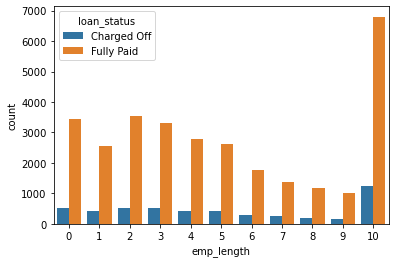

In [311]:
sns.countplot(x='emp_length',hue='loan_status',data=cleanedDF)
plt.show()

Here from the grouped plot it is clear that, higher the employee length, the better are the chances of the borrower to repay the loan.

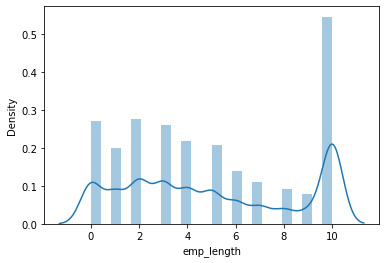

In [312]:
sns.distplot(cleanedDF['emp_length'])
plt.show()

The above result is justified by this distplot, because, the values are skewed on the right side. So if a borrower comes with a profile of employee length to be >=10 years, he would become an ideal customer for the bank.

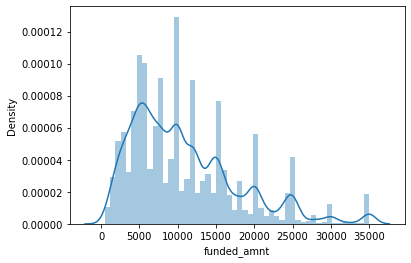

In [313]:
# Let's see how much average funding is done by the bank,
# in other words what is the most common amount of loan which is borrowed.
sns.distplot(cleanedDF['funded_amnt'])
plt.show()

The most common amount which is funded is 5000, which is evident from the graph.

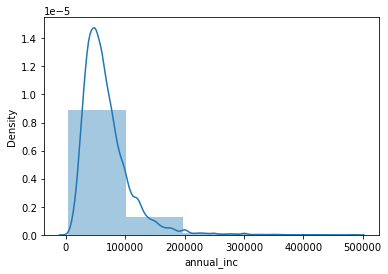

In [314]:
sns.distplot(cleanedDF[cleanedDF['annual_inc']<500000]['annual_inc'],bins=5)
plt.show()

Here from the distplot, the income is roughly clustered around 70000 and 100000. Means the income of most of the borrower is less than 1 lakh.

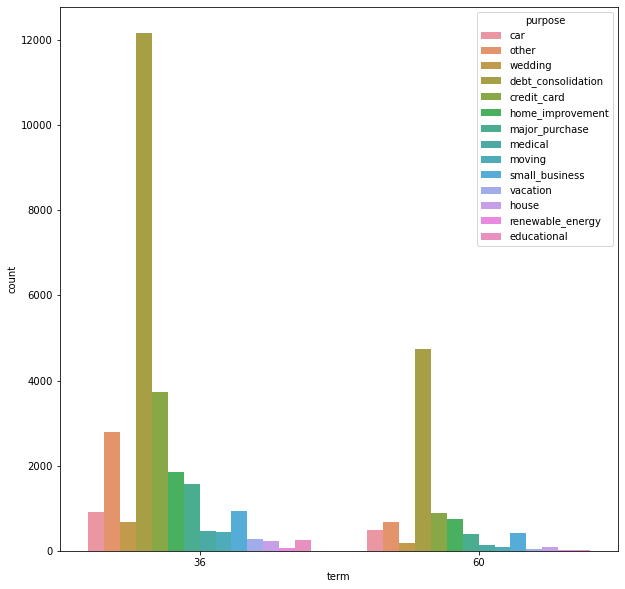

In [315]:
plt.figure(figsize=(10,10))
sns.countplot(x="term",hue='purpose',data=cleanedDF)
plt.show()

Here the term of 36 months is likely to be defaulted. Especially for the category of debt consolidation.

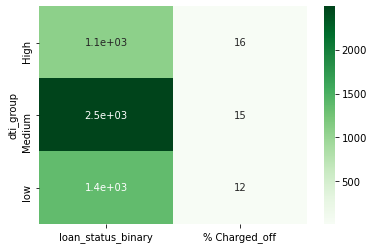

In [316]:
sns.heatmap(pivotForHeatmapDTI,cmap="Greens",annot=True)
plt.show()

Here, from this heat map, it's clear if a bifurcation would be made based on debts of the borrower, every borrower is likely to havel medium debts. The ratio of borrower to compelete the loan is higher than the loan been defaulted. The borrower havingmedium debts is most likely to repay the lended amomunt. On the opposite side, when the debts are high where the expenditure is higher they are less in number but they've failed to repay the loan amount.

In [317]:
# Now we will do pairplot analysis of major columns which might have an impact on our analysis.
forPairplot=cleanedDF[['int_rate','term','annual_inc','funded_amnt','loan_status_binary']].copy()
forPairplot.shape

(35365, 5)

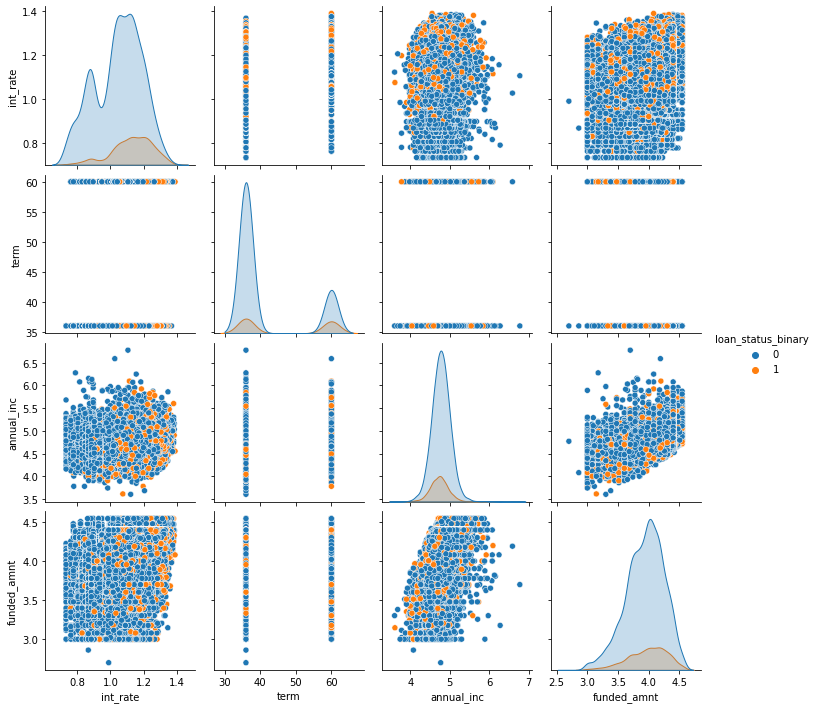

In [318]:
# We will take logs on funded_amnt,annual_inc,int_rate as these are densely populated variables:
forPairplot['funded_amnt']=np.log10(forPairplot['funded_amnt'])
forPairplot['annual_inc']=np.log10(forPairplot['annual_inc'])
forPairplot['int_rate']=np.log10(forPairplot['int_rate'])
sns.pairplot(forPairplot, hue='loan_status_binary',diag_kws={'bw': 0.2})
plt.show()

The following inferences can be obatained from the pairplot:

-> As the interest rate increases, the possibility of borrower to default the loan increases.

-> Same is the case with term, if the term for the borrower increases, the chances of repaying the amount are low.

-> If the annual income are higher of the borrower, then there are chances he will not repay the amount.

-> The funded amount is the amount funded to the borrower at that time, the higher the amount the the higher chances are of the loan been defaulted.

It might sound like that in every case the borrower sounds to fail to repay the amount, but these are only the factors which may affect the lending club's business. 

In [319]:
# Let's examine the state-wise analysis of a borrower to defaulter or full-paid.
stateWisePerformance=cleanedDF[cleanedDF['loan_status_binary']==0].groupby('addr_state',as_index=False).count()
stateWisePerformance

,addr_state,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status_binary,dti_group,% Charged_off
0,AK,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,0
1,AL,350,350,350,350,350,350,350,350,350,...,350,350,350,350,350,350,350,350,350,0
2,AR,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,0
3,AZ,652,652,652,652,652,652,652,652,652,...,652,652,652,652,652,652,652,652,652,0
4,CA,5420,5420,5420,5420,5420,5420,5420,5420,5420,...,5420,5420,5420,5420,5420,5420,5420,5420,5420,0
5,CO,602,602,602,602,602,602,602,602,602,...,602,602,602,602,602,602,602,602,602,0
6,CT,576,576,576,576,576,576,576,576,576,...,576,576,576,576,576,576,576,576,576,0
7,DC,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,189,189,189,189,0
8,DE,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,0
9,FL,2098,2098,2098,2098,2098,2098,2098,2098,2098,...,2098,2098,2098,2098,2098,2098,2098,2098,2098,0


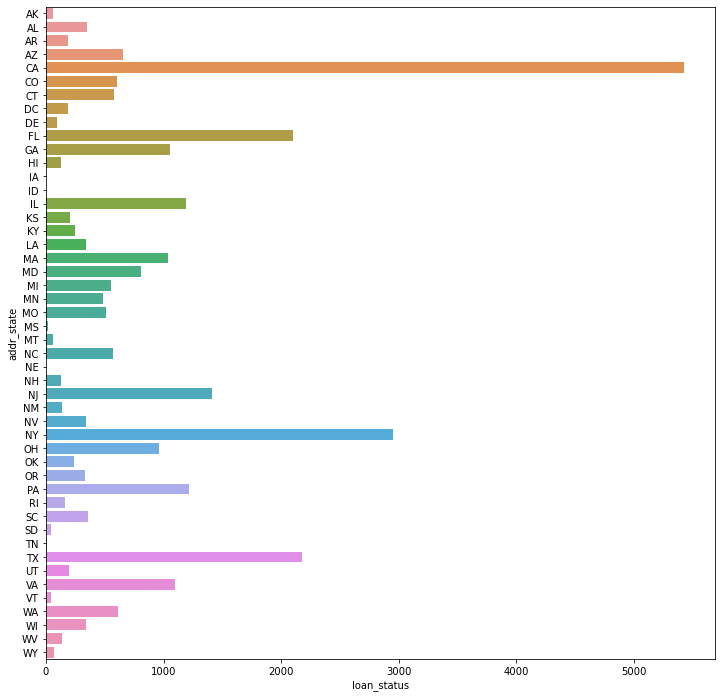

In [320]:
plt.figure(figsize=(12,12))
sns.barplot(y='addr_state',x='loan_status',data=stateWisePerformance)
plt.show()

Here this column addr_state is choosen based on the fact that this column contains the state of the borrower where the loan is given.

Here the state abbreviated as <b>'CA'</b> has highest rate of <b>defaulters</b>.

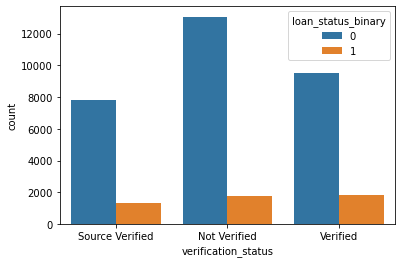

In [321]:
sns.countplot(x='verification_status',hue="loan_status_binary",data=cleanedDF)
plt.show()

Verification here plays an crucial role, as we can see. The ones who aren't verified have higher chances of dropping the loan. Hence we can say that the verification must be done irrespective of the borrower, for saftey purpose.